# van der Waals Equation
- $n \cdot R\cdot T = (P + \frac{a \cdot n^2}{V^2})(V- b \cdot n)$

where,
- V := Volume
- T := Temperature at pressure P
- P := Pressure 
- a, b := van der Waals constants
    - a provides a measure of the average attraction of the molecules,
    - b adjusts for the volume occupied by the gas particle
    
- R := The universal gas constant R = 0.0821 L * atm/(mole * K). (Adjust this accordingly for your units of measurement)

- By expanding the equation, we get the following:
$$
f(V) = P\cdot V^3 - V^2(P \cdot b \cdot n + R \cdot T \cdot) - (a \cdot V \cdot n) - (a \cdot b \cdot n^3)
$$
This will be used for our function "van_der_waals" and the derivative, $f^{\prime}(V)$ used in Newton's method "derivative_van"

In [99]:
import numpy as np

def van_der_waals(V, P, T, a, b, n, R=0.0821):
    """
    Computes the van der Waals equation adjusted to zero.
    """
    return P * V**3 - (P * n * b + n * R * T) * V**2 + a * n**2 * V - a * n**3 * b

def derivative_van(V, P, T, a, b, n, R=0.0821):
    """
    Computes the derivative of the van der Waals equation with respect to V.
    """
    return 3 * P * V**2 - 2 * (P * n * b + n * R * T) * V + a * n**2

Example from Question 3 link: https://scilearn.sydney.edu.au/fychemistry/Questions/GasLaws(advanced).htm#A3

## Plotting our original function with the settings
- Parameters for finding the volume using van der Waals equation
- P = 120  
- T = 696  
- a = 0.0341  
- b = 0.0237  
- n = 20  

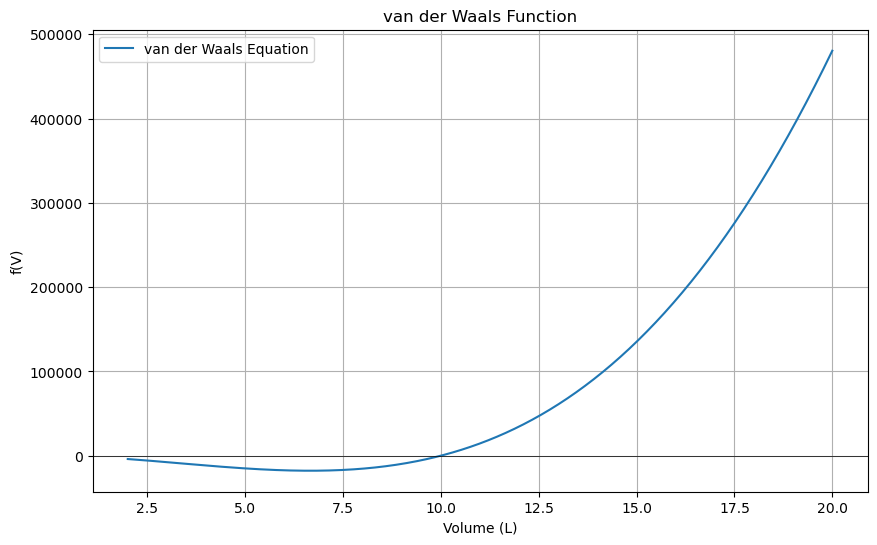

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)

# Define a range of volume values where we expect to find a physical root
volume_values = np.linspace(2, 20, 400)  # We start from a small positive value to avoid division by zero
function_values = van_der_waals(volume_values, P, T, a, b, n)

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(volume_values, function_values, label='van der Waals Equation')
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0 for reference
plt.title('van der Waals Function')
plt.xlabel('Volume (L)')
plt.ylabel('f(V)')
plt.legend()
plt.grid(True)
plt.show()


## Bisection Method
- over an interval [a,b] we want to find check if $f(a) \cdot f(b) < 0$
- then we need to find the midpoint, $c = \frac{a + b}{2}$
- next we will check if the signs are the same for f(a) and f(c) or check if f(b) anf f(c) have the same signs

In [108]:
import time

def bisection(f, a, b, TOL, count=0):
    '''
    This function will return the root for a given function f. 
    REQUIRED: f(a)*f(b) < 0.
    |f(c)| < tol with c the midpoint.
    between a and b Recursive implementation
    params:
    - f: defined as the function we want to find a root for that is continuous and f(a)*f(b) < 0
    '''

    # Check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    
    start_time = time.time()  # Start the timer
    
    c = (a + b)/2
    count += 1  # Increment the count

    if np.abs(f(c)) < TOL:
        end_time = time.time()  # End the timer
        time_elapsed = end_time - start_time
        return c, count, time_elapsed  # Return the root, the count, and the time taken
    
    elif np.sign(f(a)) == np.sign(f(c)):
        return bisection(f, c, b, TOL, count)
    
    elif np.sign(f(b)) == np.sign(f(c)):
        return bisection(f, a, c, TOL, count)

# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)

root, iterations, time_elapsed = bisection(f, 0.1, 20, TOL=10e-10)
print(f"The root by bisection method is: {root}")
print(f"Number of iterations: {iterations}")
print(f"Time taken: {time_elapsed} seconds")
print(f"The error between the truth and calculated {10 - root}")

The root by bisection method is: 9.986758471866366
Number of iterations: 45
Time taken: 2.1457672119140625e-06 seconds
The error between the truth and calculated 0.013241528133633551


## Newtons Method
$$x_{n+1} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}$$
- where f is differentiable and continuous
By expanding out our van der Waals equation, we get

- $f(V) = P\cdot V^3 - V^2(P \cdot b \cdot n + R \cdot T \cdot) - (a \cdot V \cdot n) - (a \cdot b \cdot n^3)$
- $f^\prime(V) = 3\cdot p \cdot V^2 - 2(P\cdot n \cdot b - R\cdot T \cdot n)V + a\cdot n^2$

In [102]:
import numpy as np
import time

def newtons_method(f, f_prime, x0, tol=10e-10, max_iterations=100, verbose=False):
    """
    Applies Newton's method to find the root of the equation f(x) = 0.
    
    Parameters:
    - f: The function for which to find the root.
    - x0: The initial guess for the root.
    - tol: The tolerance for the convergence of the method.
    - max_iterations: The maximum number of iterations to perform.
    - verbose: Whether to print the process (default: False).
    """
    start_time = time.time()
    x = x0
    converged = False

    for i in range(max_iterations):
        fx = f(x)
        fpx = f_prime(x)

        # Check if derivative is zero
        if fpx == 0:
            raise ValueError(f"Derivative is zero at V = {x}.")
        
        # Update x
        x_new = x - fx / fpx

        # Check convergence criteria
        if np.abs(f(x_new)) < tol and np.abs(x_new - x) / np.abs(x) < tol:
            converged = True
            x = x_new
            break

        x = x_new

        if verbose:
            true_x = 10 #Liters
            error = np.abs(true_x - x)
            print(f"Iteration {i}: V = {x}, f(V) = {fx}, error (true x - x), {error}")
    end_time = time.time()
    # Final convergence check
    if not converged:
        print("Warning: Newton's method did not converge after the maximum number of iterations.")
    time_final = end_time - start_time
    return x, i + 1, converged, time_final


# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Initial guess for V (in L).
x0 = 15

# Define the function and its derivative
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)
f_prime = lambda V: derivative_van(V, P=P, T=T, a=a, b=b, n=n)

# Apply Newton's method
root, iterations, has_converged, time_final = newtons_method(f=f, f_prime=f_prime, x0=x0, verbose=True)
# Output the results
if has_converged:
    print(f"Newton's Method converged: {root} L after {iterations} iterations. total time: {time_final}")
else:
    print(f"Newton's Method did not converge after {iterations} iterations.")

Iteration 0: V = 11.995644497790872, f(V) = 135262.93464, error (true x - x), 1.995644497790872
Iteration 1: V = 10.490945293102232, f(V) = 34658.30553801512, error (true x - x), 0.4909452931022322
Iteration 2: V = 10.030989424704233, f(V) = 6652.337130819288, error (true x - x), 0.030989424704232604
Iteration 3: V = 9.987145315402008, f(V) = 533.5176057962652, error (true x - x), 0.01285468459799155
Iteration 4: V = 9.98675850184679, f(V) = 4.6254196340555085, error (true x - x), 0.013241498153210074
Iteration 5: V = 9.986758471866345, f(V) = 0.000358443084825133, error (true x - x), 0.013241528133654867
Newton's Method converged: 9.986758471866345 L after 7 iterations. total time: 0.00011992454528808594


## Secant method (Newtons but with quotient difference instead of $f^{\prime}(x_n)$)

$$x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

In [107]:
import numpy as np
import time

def secant_method(f, x0, x1, tol, max_iterations, verbose=False):
    '''
    Uses the Secant method to find a root of a function.
    
    Parameters:
    - f: The function for which to find the root.
    - x0, x1: The initial two guesses for the root.
    - tol: The tolerance for the convergence of the method.
    - max_iterations: The maximum number of iterations to perform.
    - verbose: Whether to print the process (default: False).
    
    Returns:
    - A dictionary with the root, the number of iterations, and a flag indicating convergence.
    '''
    start_time = time.time()
    if tol <= 0:
        raise ValueError("Tolerance must be positive.")
    
    for i in range(max_iterations):
        f_x0 = f(x0)
        f_x1 = f(x1)
        denominator = (f_x1 - f_x0)
        
        # Avoid division by zero
        if denominator == 0:
            print("Warning: Division by zero encountered in the Secant method.")
            return {"root": None, "iterations": i, "converged": False}

        x_new = x1 - (f_x1 * (x1 - x0) / denominator)
        
        if verbose:
            true_x = 10
            error = true_x - x_new
            print(f"Iteration {i+1}: x = {x_new}, f(x) = {f(x_new)}, error: {error}")
    
        if np.abs(x_new - x1) < tol:
            elapsed_time = time.time() - start_time
            return {"root": x_new, "iterations": i + 1, "converged": True, "time": elapsed_time}
        
        x0, x1 = x1, x_new
    elapsed_time = time.time() - start_time   
    return {"root": x1, "iterations": max_iterations, "converged": False, "time": elapsed_time}

# Parameters for finding the root using the van der Waals equation
x0, x1 = 10, 15 
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Define the function using the van der Waals equation
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)

# Apply the Secant method
result = secant_method(f, x0=x0, x1=x1, tol=10e-10, max_iterations=100, verbose=True)

# Output the results
if result["converged"]:
    print(f"The Secant Method converged: {result['root']} after {result['iterations']} iterations, in {result['time']} seconds.")
else:
    print(f"The Secant Method did not converge after {result['iterations']} iterations.")


Iteration 1: x = 9.994125473523399, f(x) = 88.20916622559477, error: 0.0058745264766013605
Iteration 2: x = 9.990858856804461, f(x) = 49.06406107776255, error: 0.009141143195538604
Iteration 3: x = 9.986764513932975, f(x) = 0.07223840866925446, error: 0.013235486067024738
Iteration 4: x = 9.98675847682724, f(x) = 5.931197029429569e-05, error: 0.013241523172759173
Iteration 5: x = 9.98675847186635, f(x) = 5.170353034600339e-11, error: 0.013241528133649538
Iteration 6: x = 9.986758471866347, f(x) = 7.990941242042027e-12, error: 0.013241528133653091
The Secant Method converged: 9.986758471866347 after 6 iterations, in 0.00030994415283203125 seconds.


## Comparison of both Newton's and Secant methods

In [104]:
import numpy as np
import time

# Newton's Method

def newtons_method(f, df, x0, tol=1e-8, max_iterations=100):
    start_time = time.time()
    for i in range(max_iterations):
        x1 = x0 - f(x0)/df(x0)
        if np.abs(x1 - x0) < tol:
            return x1, i+1, time.time() - start_time
        x0 = x1
    return x0, max_iterations, time.time() - start_time

# Secant Method

def secant_method(f, x0, x1, tol=1e-8, max_iterations=100):
    start_time = time.time()
    for i in range(max_iterations):
        x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
        if np.abs(x2 - x1) < tol:
            return x2, i+1, time.time() - start_time
        x0, x1 = x1, x2
    return x1, max_iterations, time.time() - start_time

# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Initial guess for V (in L).
x0 = 7.5

# Define the function and its derivative
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)
f_prime = lambda V: derivative_van(V, P=P, T=T, a=a, b=b, n=n)

# Run both methods
newton_root, newton_iters, newton_time = newtons_method(f, f_prime, x0=12)
secant_root, secant_iters, secant_time = secant_method(f, x0=0.1, x1=20)

# Compare results
print(f"Newton's Method: Root = {newton_root}, Iterations = {newton_iters}, Time = {newton_time} seconds")
print(f"Secant Method: Root = {secant_root}, Iterations = {secant_iters}, Time = {secant_time} seconds")

# Vary initial conditions and repeat the comparison

Newton's Method: Root = 9.986758471866345, Iterations = 6, Time = 4.887580871582031e-05 seconds
Secant Method: Root = 0.06891775432407876, Iterations = 100, Time = 0.00033593177795410156 seconds


# Comparing initial guess variability with performance of iteration count and timing

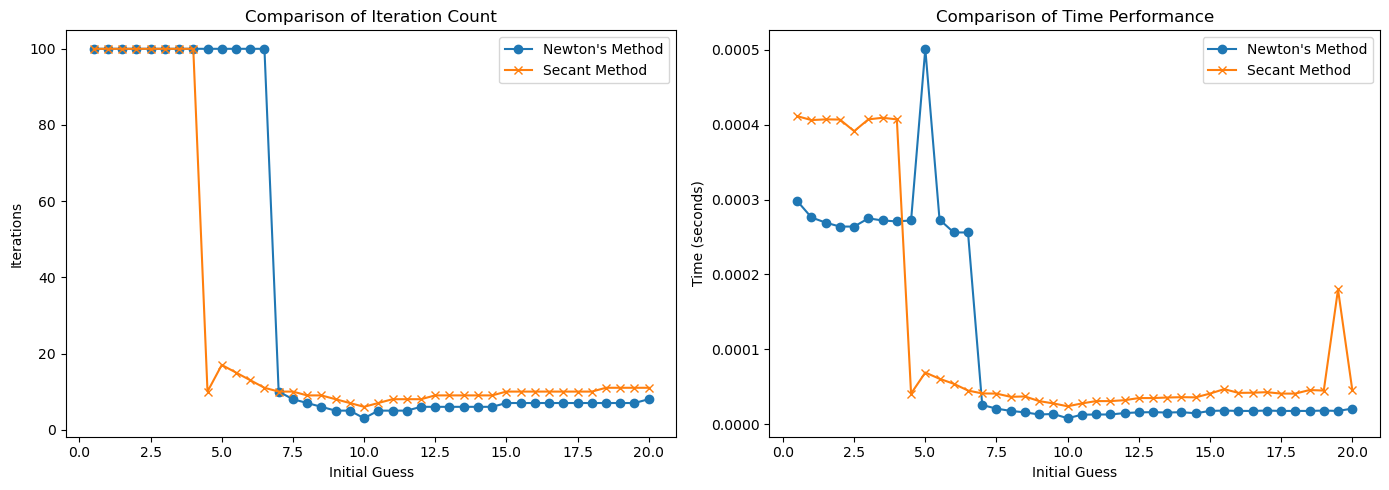

In [105]:
import matplotlib.pyplot as plt

# Running both methods with initial guesses and storing the results
initial_guesses = np.linspace(0.5, 20, 40)  # Varying initial guesses for both methods
newton_results = [newtons_method(f, f_prime, x0=guess) for guess in initial_guesses]
secant_results = [secant_method(f, x0=guess, x1=guess+10) for guess in initial_guesses]

# Extracting iterations and times for plotting
newton_iters = [result[1] for result in newton_results]
newton_times = [result[2] for result in newton_results]
secant_iters = [result[1] for result in secant_results]
secant_times = [result[2] for result in secant_results]

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Iterations subplot
ax1.plot(initial_guesses, newton_iters, label='Newton\'s Method', marker='o')
ax1.plot(initial_guesses, secant_iters, label='Secant Method', marker='x')
ax1.set_title('Comparison of Iteration Count')
ax1.set_xlabel('Initial Guess')
ax1.set_ylabel('Iterations')
ax1.legend()

# Time subplot
ax2.plot(initial_guesses, newton_times, label='Newton\'s Method', marker='o')
ax2.plot(initial_guesses, secant_times, label='Secant Method', marker='x')
ax2.set_title('Comparison of Time Performance')
ax2.set_xlabel('Initial Guess')
ax2.set_ylabel('Time (seconds)')
ax2.legend()

plt.tight_layout()
plt.show()

## Comments
- We need to be careful about timing performance because it varys on the computer and how well the cpu is
- iteration performance is much more reliable rather than the timing chart